# Project 5

#### `Importing` Python packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

#### Reading Data

In [2]:
df = pd.read_excel(r"D:\Downloads\Default.xlsx",usecols = [1,2,3,4])

C:\Users\dubey\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## EDA
#### Understanding Data

In [3]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [5]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [6]:
(df.balance == 0).sum(axis=0)

499

In [7]:
df.shape

(10000, 4)

#### Checking for null values

In [8]:
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [9]:
df.student.value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [10]:
df.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [11]:
df['default2'] = df.default.factorize()[0] 

In [12]:
df['student2'] = df.student.factorize()[0] 

In [13]:
df.head(3)

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0


In [14]:
df_dfno = df[df.default2 == 0].sample(frac=0.15)

In [15]:
df_dfyes = df[df.default2 == 1]    

In [16]:
df_new = df_dfno.append(df_dfyes)

In [17]:
x = df_new[df_new.default == 'No'].balance
x1 = df_new[df_new.default == 'Yes'].balance

In [18]:
y = df_new[df_new.default == 'No'].income
y1 = df_new[df_new.default == 'Yes'].income

C:\Users\dubey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dubey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


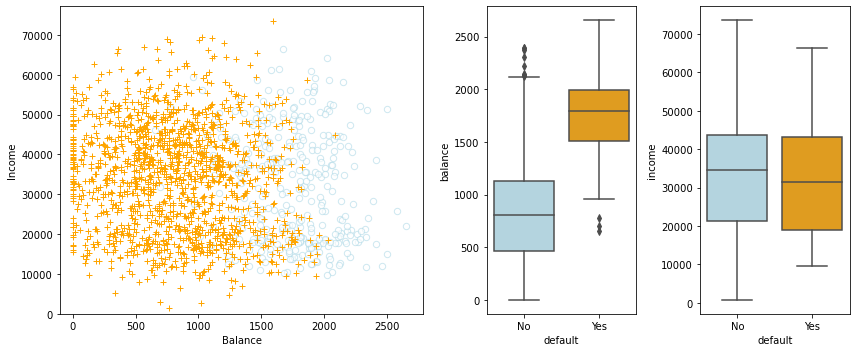

In [19]:
fig = plt.figure(figsize=(12,5)) 
gs = mpl.gridspec.GridSpec(1, 4) 
ax1 = plt.subplot(gs[0,:2]) 
ax2 = plt.subplot(gs[0,2:3]) 
ax3 = plt.subplot(gs[0,3:4]) 
ax1.scatter(x1,y1, s=40, marker='o', linewidths=1, edgecolors='lightblue', facecolors='white', alpha=0.6) 
ax1.scatter(x,y, s=40, c='orange', marker='+', linewidths=1) 
ax1.set_ylim(ymin=0) 
ax1.set_ylabel('Income') 
ax1.set_xlim(xmin=-100) 
ax1.set_xlabel('Balance') 
c_palette = {'No':'lightblue', 'Yes':'orange'} 
sns.boxplot('default', 'balance', data=df, orient='v', ax=ax2, palette=c_palette) 
sns.boxplot('default', 'income', data=df, orient='v', ax=ax3, palette=c_palette) 
gs.tight_layout(plt.gcf()) 

#### Train Test Split

In [20]:
X_train = df.balance.values.reshape(-1,1)

In [21]:
y = df.default2

In [22]:
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1 ,1)

## Using Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model_log = LogisticRegression(solver='newton-cg')

In [25]:
model_log.fit(X_train,y)

LogisticRegression(solver='newton-cg')

In [26]:
y_pred_log = model_log.predict_proba(X_test)

In [27]:
y_pred_log

array([[9.99976331e-01, 2.36688877e-05],
       [9.99976201e-01, 2.37993963e-05],
       [9.99976069e-01, 2.39306245e-05],
       ...,
       [1.92313655e-02, 9.80768635e-01],
       [1.91279213e-02, 9.80872079e-01],
       [1.90250228e-02, 9.80974977e-01]])

C:\Users\dubey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


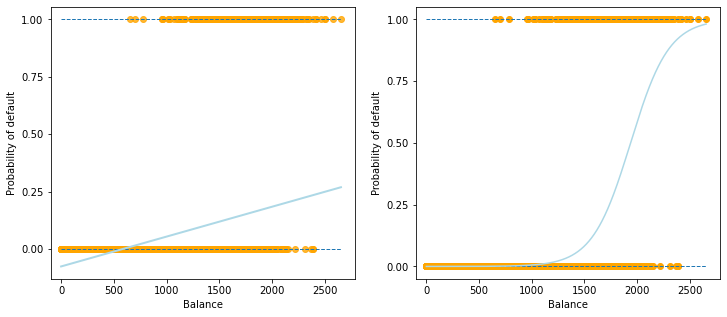

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5)) 
sns.regplot(df.balance, df.default2, order=1, ci=None,scatter_kws={'color':'orange'},line_kws={'color':'lightblue', 'lw':2}, ax=ax1) 
ax2.scatter(X_train, y, color='orange') 
ax2.plot(X_test, y_pred_log[:,1], color='lightblue') 
for ax in fig.axes: 
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1) 
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1) 
    ax.set_ylabel('Probability of default') 
    ax.set_xlabel('Balance') 
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.]) 
    ax.set_xlim(xmin=-100)

In [29]:
print(model_log)

LogisticRegression(solver='newton-cg')


In [30]:
print('classes: ',model_log.classes_)

classes:  [0 1]


In [31]:
print('coefficients: ',model_log.coef_)

coefficients:  [[0.00549891]]


In [32]:
print('intercept :', model_log.intercept_) 

intercept : [-10.65132546]


### Logistic Regression - statsmodel

In [33]:
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as sms

In [34]:
pd.set_option('precision', 6)

In [35]:
X_train = sm.add_constant(df.balance)

C:\Users\dubey\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [36]:
est = sm.Logit(y.ravel(), X_train).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [37]:
est.summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


### Logistic Regression - Dummy Variable

In [38]:
X_train = sm.add_constant(df.student2)

C:\Users\dubey\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [39]:
y = df.default2

In [40]:
est = sms.Logit(y, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


In [41]:
print(est.summary().tables[1].as_text())

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student2       0.4049      0.115      3.520      0.000       0.179       0.630


### Multiple Logistic Regression

In [42]:
X_train = sm.add_constant(df[['balance', 'income', 'student2']])

C:\Users\dubey\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
est = sms.Logit(y, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [44]:
print(est.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student2      -0.6468      0.236     -2.738      0.006      -1.110      -0.184


### Confounding
#### Create balance and default vectors for students

In [45]:
X_train = df[df.student == 'Yes'].balance.values.reshape(-1,1)

In [46]:
y = df[df.student == 'Yes'].default2

#### Create balance and default vectors for non- students

In [47]:
X_train2 = df[df.student == 'No'].balance.values.reshape(-1,1)

In [48]:
y2 = df[df.student == 'No'].default2

In [49]:
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

In [50]:
model_log1 = LogisticRegression(solver='newton-cg')

In [51]:
model_log2 = LogisticRegression(solver='newton-cg')

In [52]:
model_log1.fit(X_train,y)

LogisticRegression(solver='newton-cg')

In [53]:
model_log2.fit(X_train2,y2)

LogisticRegression(solver='newton-cg')

In [54]:
prob = model_log1.predict_proba(X_test) 

In [55]:
prob2 = model_log2.predict_proba(X_test) 

In [56]:
df.groupby(['student','default']).size().unstack('default')

default,No,Yes
student,,
No,6850,206
Yes,2817,127


C:\Users\dubey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


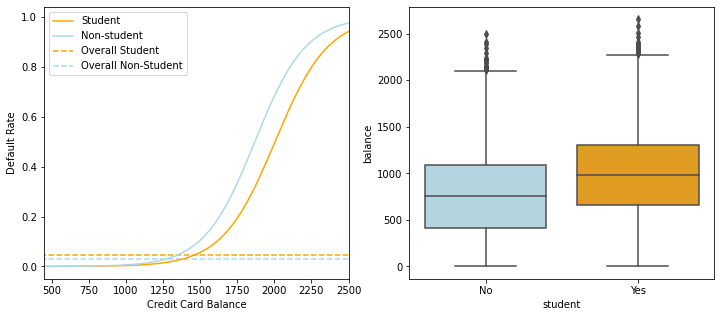

In [57]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5)) 
# Left plot 
ax1.plot(X_test, prob[:,1], color='orange', label='Student') 
ax1.plot(X_test, prob2[:,1], color='lightblue', label='Non-student') 
ax1.hlines(127/2817, colors='orange', label='Overall Student',xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed') 
ax1.hlines(206/6850, colors='lightblue', label='Overall Non-Student',xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed') 
ax1.set_ylabel('Default Rate') 
ax1.set_xlabel('Credit Card Balance') 
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.]) 
ax1.set_xlim(450,2500) 
ax1.legend(loc=2) 
# Right plot 
sns.boxplot('student', 'balance', data=df, orient='v', ax=ax2,  palette=c_palette);

## Linear Discriminant Analysis
#### 50% Threshold

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [59]:
X = df[['balance', 'income', 'student2']]

In [60]:
y = df.default2  

In [61]:
model_lda = LinearDiscriminantAnalysis(solver='svd')

In [62]:
y_pred = model_lda.fit(X, y).predict(X)

In [63]:
df_pred = pd.DataFrame({'True default status': y, 'Predicted default status': y_pred})

In [64]:
df_pred.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

In [65]:
df_pred.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9645,254
Yes,22,79


#### 20% Threshold

In [66]:
decision_prob = 0.2

In [67]:
y_prob = model_lda.fit(X, y).predict_proba(X)

In [68]:
df_pred = pd.DataFrame({'True default status': y,'Predicted default status': y_prob[:,1] > decision_prob})

In [69]:
df_pred.replace(to_replace={0:'No', 1:'Yes', 'True':'Yes', 'False':'No'}, inplace=True)

In [70]:
df_pred.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
False,9435,140
True,232,193
